In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('bitcoin_last_year.csv', encoding='utf8')

# take a look at the dataset
df.head()

,Day,Date,Open,High,Low,Close,Volume,Market Cap
0,1,6-Mar-23,"$22,436.82","$22,584.29","$22,331.31","$22,429.76","$17,353,192,895","$433,122,543,176"
1,2,7-Mar-23,"$22,428.32","$22,527.42","$22,011.26","$22,219.77","$22,765,452,204","$429,090,671,120"
2,3,8-Mar-23,"$22,216.44","$22,268.90","$21,708.05","$21,718.08","$22,536,575,684","$419,421,447,158"
3,4,9-Mar-23,"$21,720.08","$21,802.72","$20,210.31","$20,363.02","$30,364,664,171","$393,268,847,888"
4,5,10-Mar-23,"$20,367.00","$20,370.60","$19,628.25","$20,187.24","$39,578,257,695","$389,890,609,884"


In [3]:
df.describe()

,Day
count,364.000000
mean,182.500000
std,105.221988
min,1.000000
25%,91.750000
50%,182.500000
75%,273.250000
max,364.000000


In [4]:
cdf = df[['Day','Date','Open','High','Low','Close','Volume','Market Cap']]

cdf.head(9)

,Day,Date,Open,High,Low,Close,Volume,Market Cap
0,1,6-Mar-23,"$22,436.82","$22,584.29","$22,331.31","$22,429.76","$17,353,192,895","$433,122,543,176"
1,2,7-Mar-23,"$22,428.32","$22,527.42","$22,011.26","$22,219.77","$22,765,452,204","$429,090,671,120"
2,3,8-Mar-23,"$22,216.44","$22,268.90","$21,708.05","$21,718.08","$22,536,575,684","$419,421,447,158"
3,4,9-Mar-23,"$21,720.08","$21,802.72","$20,210.31","$20,363.02","$30,364,664,171","$393,268,847,888"
4,5,10-Mar-23,"$20,367.00","$20,370.60","$19,628.25","$20,187.24","$39,578,257,695","$389,890,609,884"
5,6,11-Mar-23,"$20,187.88","$20,792.53","$20,068.66","$20,632.41","$30,180,288,176","$398,509,689,462"
6,7,12-Mar-23,"$20,628.03","$22,185.03","$20,448.81","$22,163.95","$29,279,035,521","$428,114,557,465"
7,8,13-Mar-23,"$22,156.41","$24,550.84","$21,918.20","$24,197.53","$49,466,362,688","$467,417,380,967"
8,9,14-Mar-23,"$24,201.77","$26,514.72","$24,081.18","$24,746.07","$54,622,230,164","$478,037,073,215"


In [5]:
cdf['Close'] = cdf['Close'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf['High'] = cdf['High'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf['Low'] = cdf['Low'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf['Open'] = cdf['Open'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf['Volume'] = cdf['Volume'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf['Market Cap'] = cdf['Market Cap'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf

,Day,Date,Open,High,Low,Close,Volume,Market Cap
0,1,6-Mar-23,22436.82,22584.29,22331.31,22429.76,1.735319e+10,4.331225e+11
1,2,7-Mar-23,22428.32,22527.42,22011.26,22219.77,2.276545e+10,4.290907e+11
2,3,8-Mar-23,22216.44,22268.90,21708.05,21718.08,2.253658e+10,4.194214e+11
3,4,9-Mar-23,21720.08,21802.72,20210.31,20363.02,3.036466e+10,3.932688e+11
4,5,10-Mar-23,20367.00,20370.60,19628.25,20187.24,3.957826e+10,3.898906e+11
...,...,...,...,...,...,...,...,...
359,360,28-Feb-24,57071.10,63913.13,56738.42,62504.79,8.323916e+10,1.227616e+12
360,361,29-Feb-24,62499.18,63585.64,60498.73,61198.38,6.549661e+10,1.202009e+12
361,362,1-Mar-24,61168.06,63155.10,60802.53,62440.63,4.018637e+10,1.226468e+12
362,363,2-Mar-24,62431.65,62458.70,61657.29,62029.85,2.388847e+10,1.218449e+12


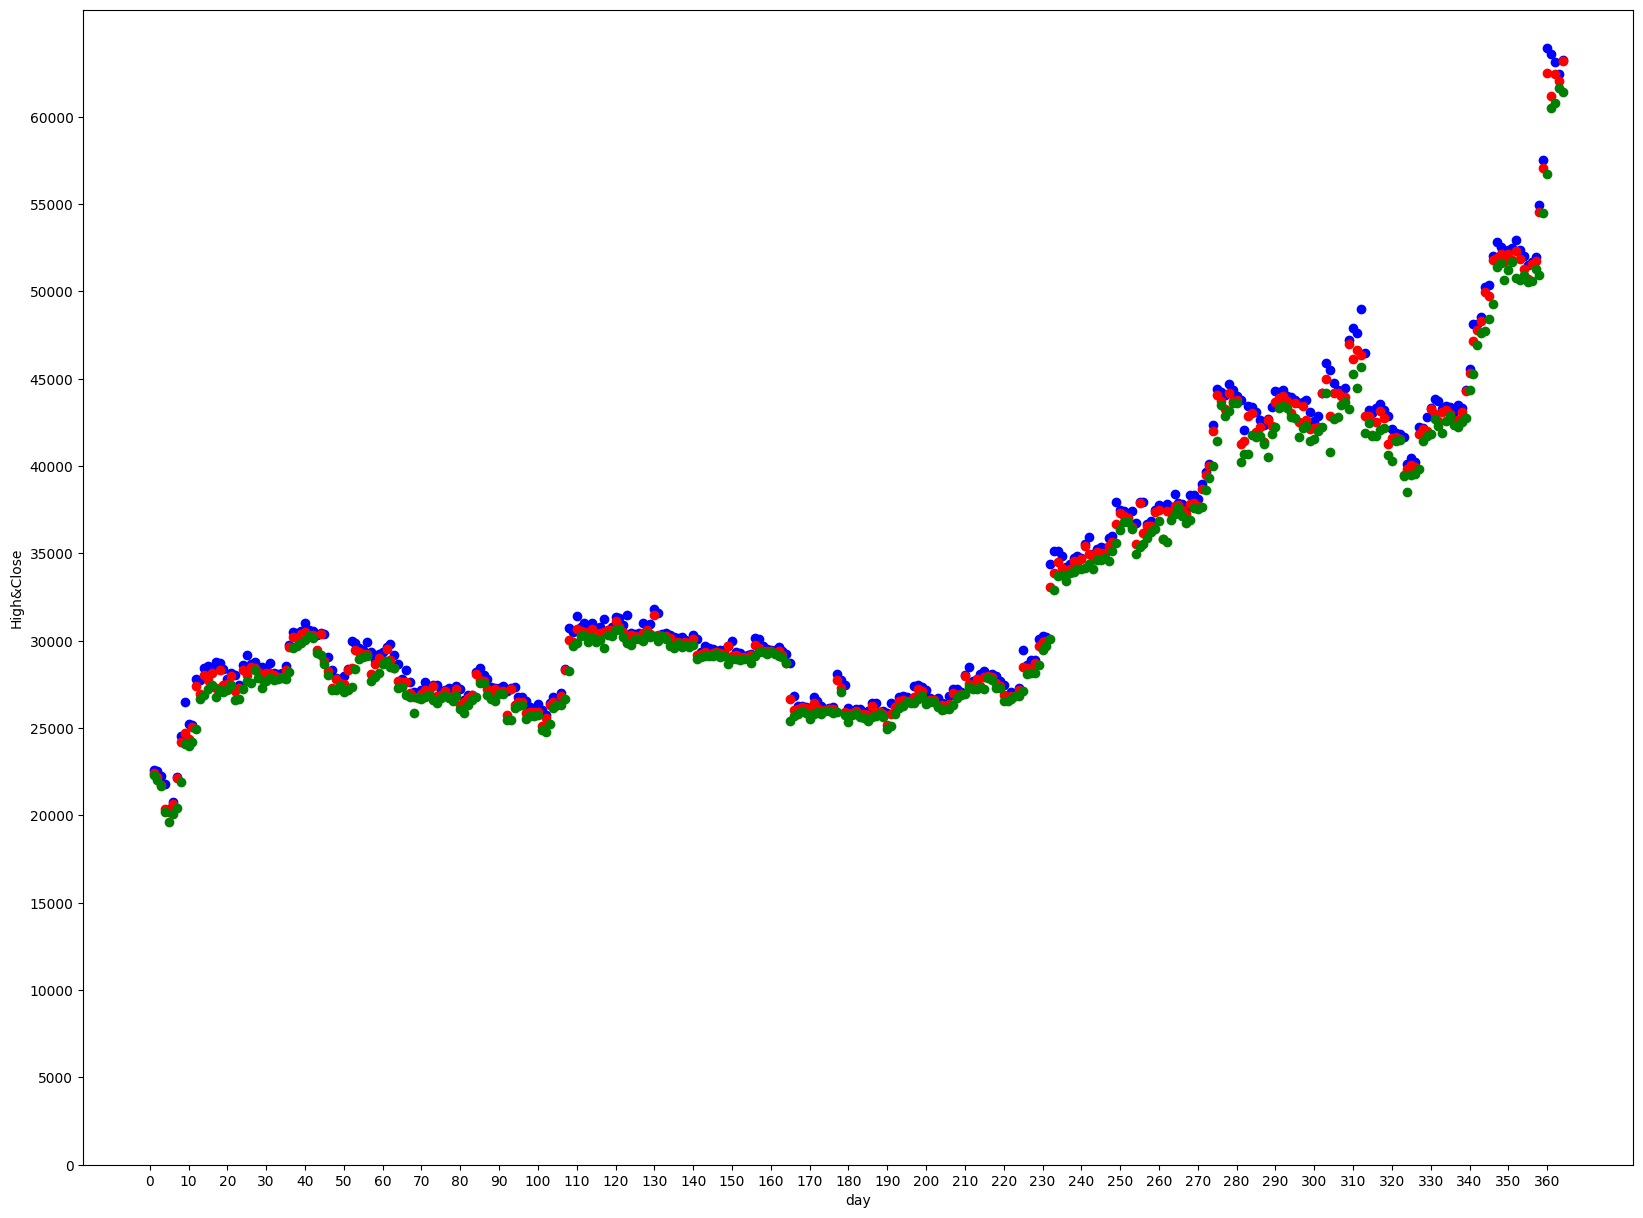

In [6]:
plt.figure(figsize=(20, 15))
plt.scatter(cdf.Day, cdf.High,  color='blue')
plt.scatter(cdf.Day, cdf.Close, color='red')
plt.scatter(cdf.Day, cdf.Low, color='green')
# plt.scatter(cdf.Day, cdf.Volume, color='yellow')
# plt.scatter(cdf.Day, cdf['Market Cap'], color='black')
plt.xlabel("day")
plt.ylabel("High&Close")
plt.xticks(range(0, max(df.Day) + 1, 10))
plt.yticks(range(0, int(max(cdf.High)) + 1, 5000))
plt.show()

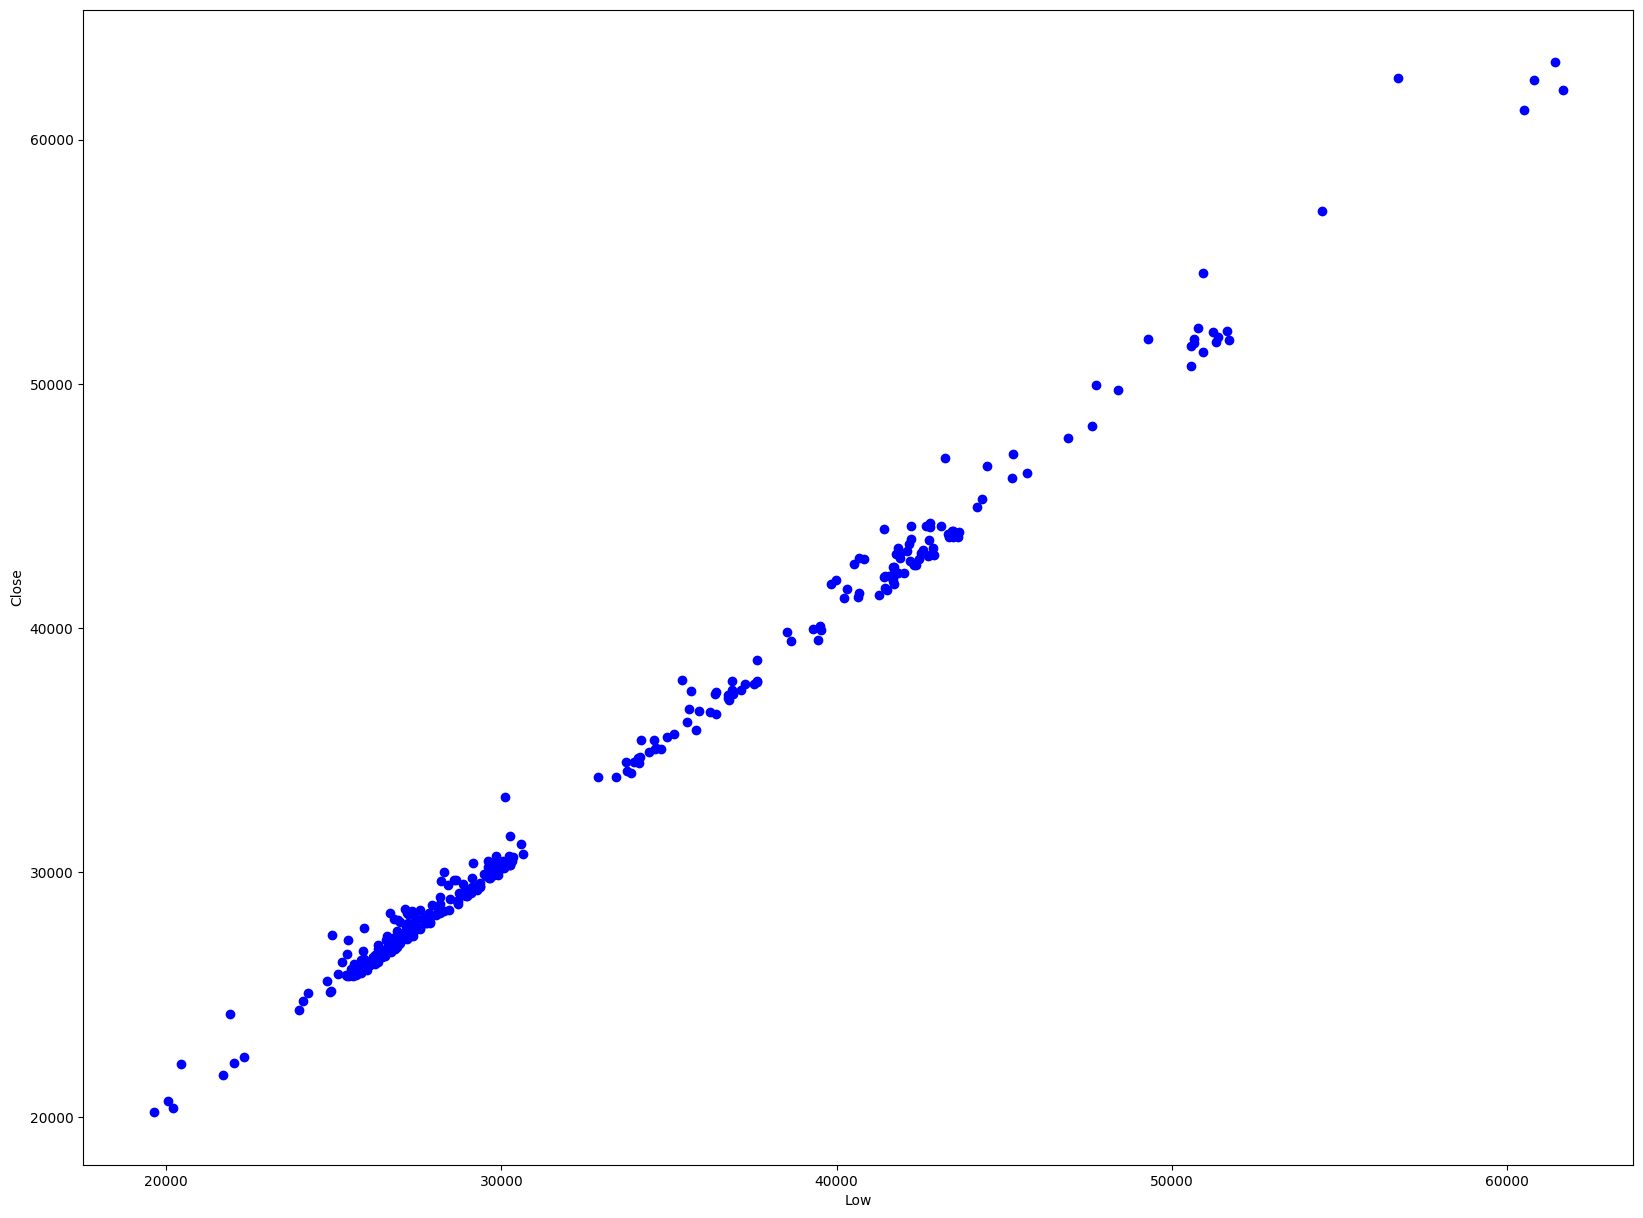

In [7]:
plt.figure(figsize=(20, 15))
plt.scatter(cdf.Low, cdf.Close,  color='blue')
# plt.scatter(cdf.Day, cdf.Volume, color='yellow')
# plt.scatter(cdf.Day, cdf['Market Cap'], color='black')
plt.xlabel("Low")
plt.ylabel("Close")
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['Low']])
y = np.asanyarray(train[['Close']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

Coefficients:  [[1.03524669]]
intercept:  [-548.42400605]


## Predict close with low=62783

In [10]:
regr.predict([[62783]])

array([[64447.46918607]])

In [11]:
test_copy = test.copy()
test_copy['High'] = test_copy['High'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Low'] = test_copy['Low'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Volume'] = test_copy['Volume'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Market Cap'] = test_copy['Market Cap'].replace({'\\$': '', ',': ''}, regex=True)

y_hat= regr.predict(test_copy[['Low']])
x = np.asanyarray(test_copy[['Low']])
y = np.asanyarray(test[['Close']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 265494.37
Variance score: 1.00


/home/alirezadigi/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


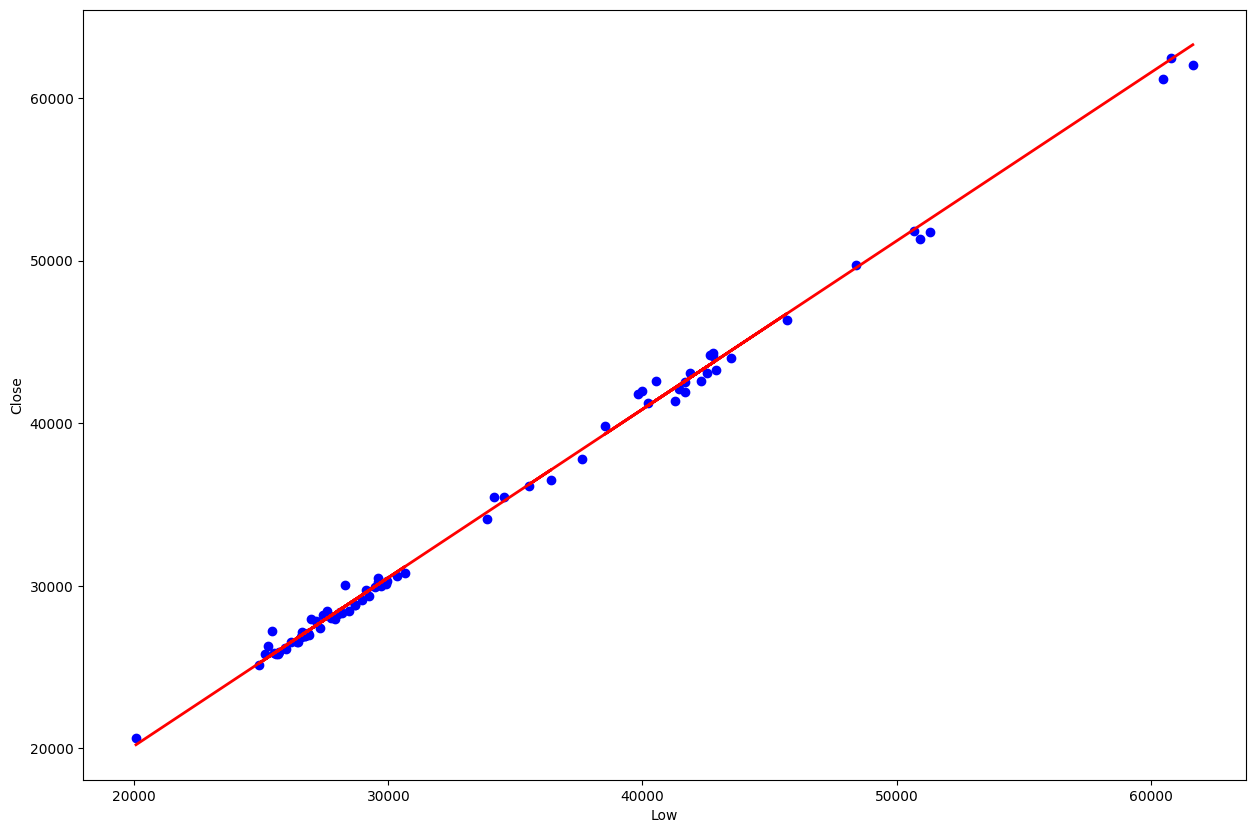

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(x,y,color='blue')

plt.plot(x, y_hat, color="red", linewidth=2)


plt.xlabel("Low")
plt.ylabel("Close")
plt.show()

# Volume

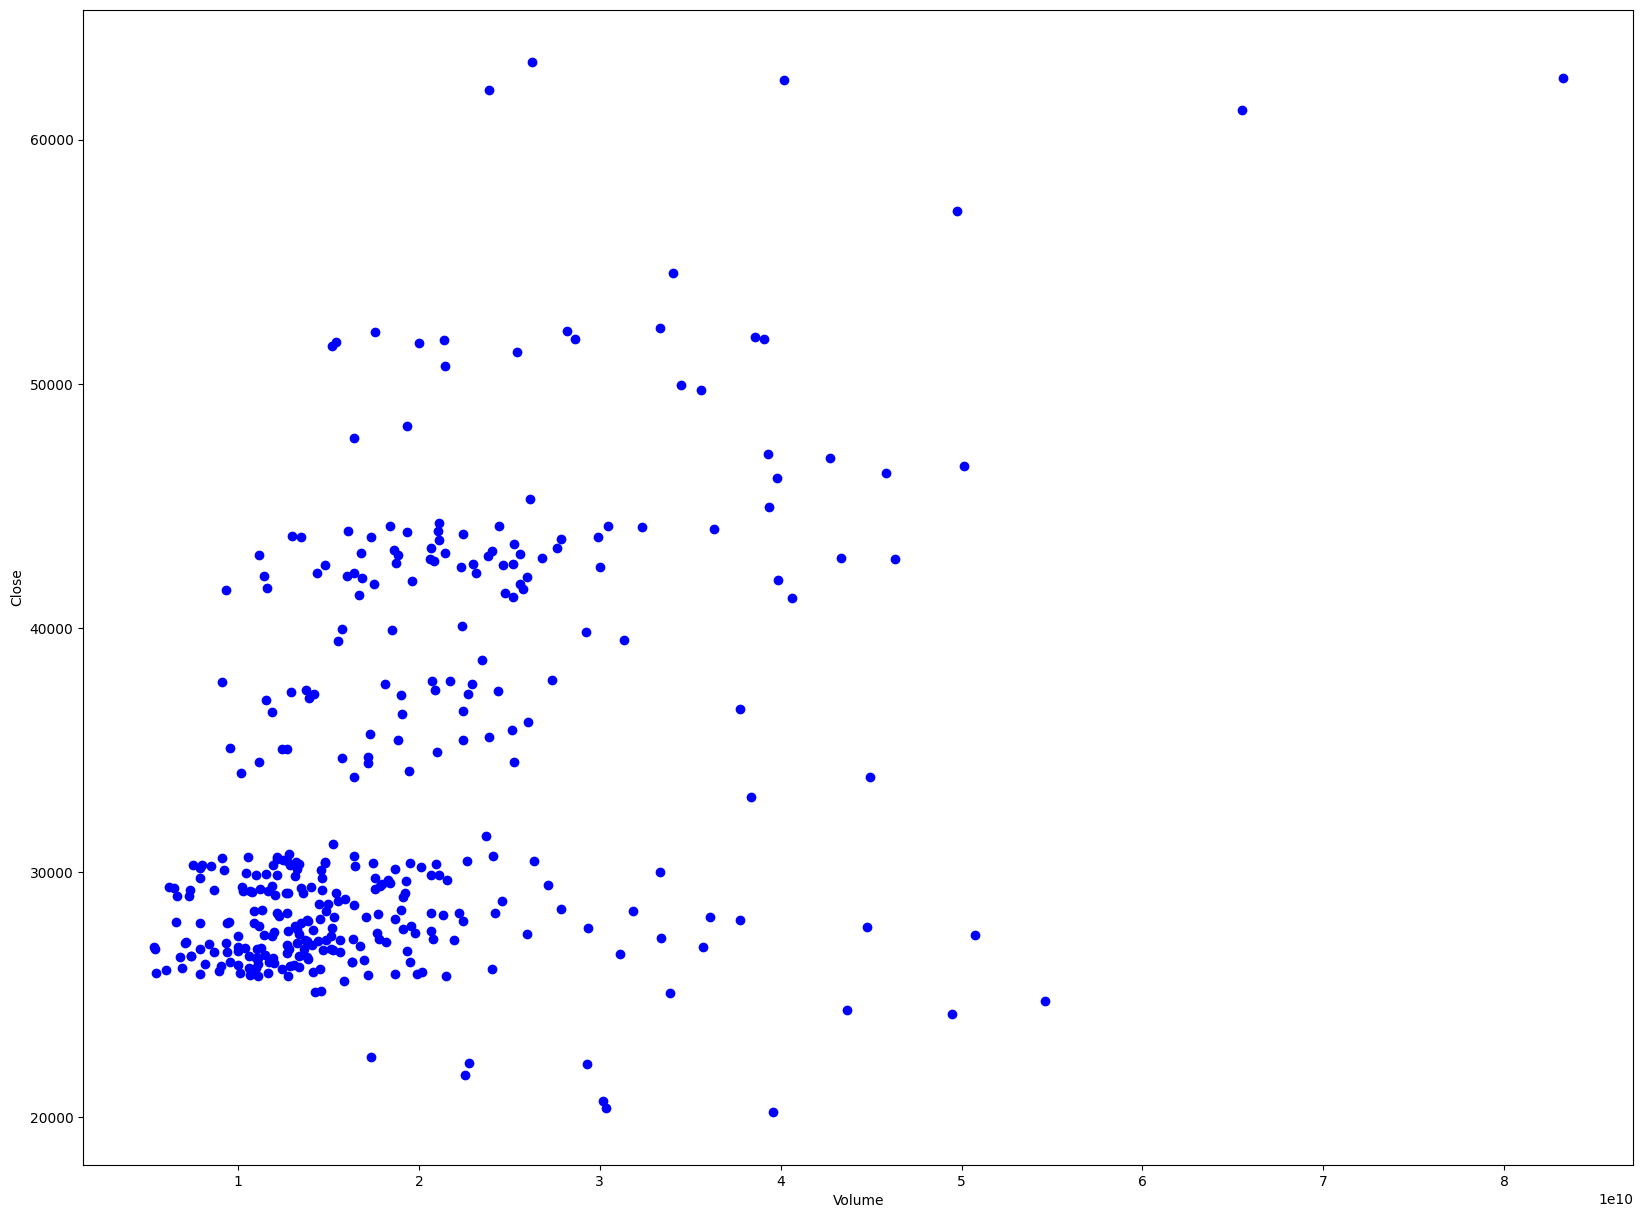

In [13]:
plt.figure(figsize=(20, 15))
plt.scatter(cdf.Volume,cdf.Close, color='blue')
# plt.scatter(cdf.Day, cdf.Volume, color='yellow')
# plt.scatter(cdf.Day, cdf['Market Cap'], color='black')
plt.xlabel("Volume")
plt.ylabel("Close")
plt.show()

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['Volume']])
y = np.asanyarray(train[['Close']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

Coefficients:  [[3.71184771e-07]]
intercept:  [26347.96883819]


## Predict close with Volume=32,155,786,816

In [16]:
regr.predict([[32155786816]])

array([[38283.70720847]])

In [17]:
test_copy = test.copy()
test_copy['High'] = test_copy['High'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Low'] = test_copy['Low'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Volume'] = test_copy['Volume'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Market Cap'] = test_copy['Market Cap'].replace({'\\$': '', ',': ''}, regex=True)

y_hat= regr.predict(test_copy[['Volume']])
x = np.asanyarray(test_copy[['Volume']])
y = np.asanyarray(test[['Close']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 46164101.15
Variance score: 0.28


/home/alirezadigi/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


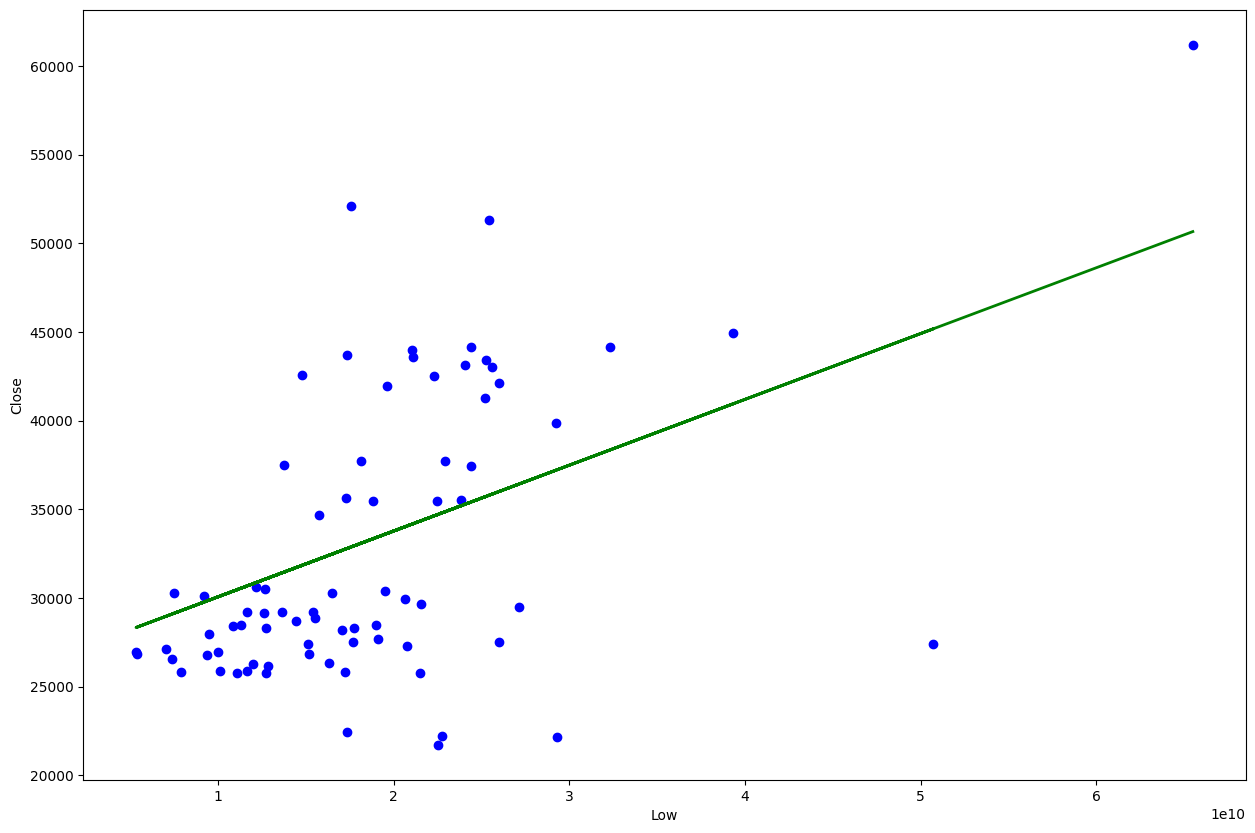

In [18]:
plt.figure(figsize=(15, 10))
plt.scatter(x,y,color='blue')

plt.plot(x, y_hat, color="green", linewidth=2)


plt.xlabel("Low")
plt.ylabel("Close")
plt.show()